# This shows distribution of feature and noise barcodes 

Size of the input file: 180


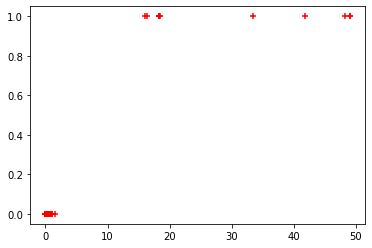

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("ripser test data_99.6.csv")
print("Size of the input file:",len(df))
plt.scatter(df['diff'],df.target,marker="+",color="red")

# Train-test split with cross validation and accuracy score

In [2]:
### random state = 0               --- for reproducibility

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(df[['diff']],df.target, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
score = model.score(X_test,y_test)

print("The size of test set",len(X_test))
print("The ouput of  test set",y_pred)
print("The performance score of the model is", score)



#### crosss validation

from sklearn.model_selection import KFold
import sklearn


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_scores = sklearn.model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(linear_scores)
print('Average cross-validation score: {:.4f}'.format(linear_scores.mean()))

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


The size of test set 36
The ouput of  test set [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
The performance score of the model is 1.0
[1. 1. 1. 1. 1.]
Average cross-validation score: 1.0000


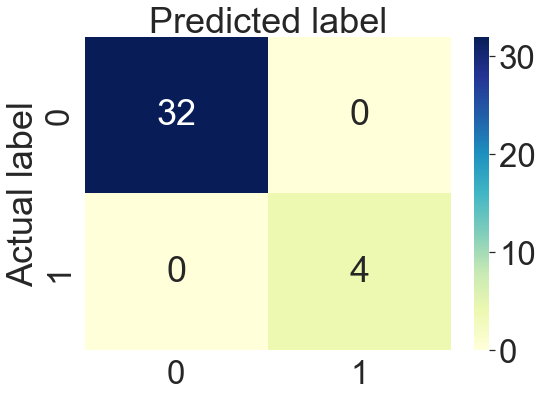

In [10]:
### Confusion Matrix

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
cnf_matrix

import seaborn as sns
sns.set(rc={'figure.figsize':(8,6)})     ##### Figure size

sns.set(font_scale=3)                          #### font size

class_names=[1,0] # name  of classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
#plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

### viridis,YlGnBu,inferno,cividis,winter

ax.xaxis.set_label_position("top")
plt.tight_layout()
#plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


plt.savefig('cnf_mat_lor.png', bbox_inches='tight',dpi=300)
plt.savefig('cnf_mat_lor.eps', bbox_inches='tight',dpi=300)



# This code sequentially takes barcodes extracted from newer parameters and classifies noise count - feature count by the trained ML classifier 

In [3]:


############ 600

Scr = []
Noise_score = []

Rho = np.arange(99.6,102,0.02)



for i in range(len(Rho)):
    
    Rho[i] = np.round(Rho[i],2)
    
    lan = Rho[i]
    print("600 Landmarks of Rho:",lan)
    df1 = pd.read_csv(f"test data_new parameter range\\ripser_plot_Rho={Rho[i]}_600(diff).csv")

    
    
    xtest1 = df1[['diff']]
    test1 = model.predict(xtest1)
    print("Number of barcodes:",len(xtest1))
    print(f"The output of test set_{lan}:",test1)
#----------------------------------------------------------------------------------------------------------------    
    Noise = 0
    feature = 0
#    print(len(test1))

    for i in range(len(test1)):
        if test1[i] == 0:
            Noise = Noise + 1
        else:
            feature = feature + 1
    print("No of noise:",Noise)
    print("No of features:",feature)
#-----------------------------------------------------------------------------------------------------------------
    
    Score = Noise/(feature + 1)
    
    Scr.append(Score)
    
    
    Noise_score.append(Noise)
    
    print("Score:",Score)
    
    print()

print("Noise score:",Noise_score)

print("The score array:",Scr)
print("score length:",len(Scr))

600 Landmarks of Rho: 99.6
Number of barcodes: 50
The output of test set_99.6: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1]
No of noise: 48
No of features: 2
Score: 16.0

600 Landmarks of Rho: 99.62
Number of barcodes: 52
The output of test set_99.62: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
No of noise: 50
No of features: 2
Score: 16.666666666666668

600 Landmarks of Rho: 99.64
Number of barcodes: 68
The output of test set_99.64: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
No of noise: 66
No of features: 2
Score: 22.0

600 Landmarks of Rho: 99.66
Number of barcodes: 59
The output of test set_99.66: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
No of noise: 57
No of features: 2
Score: 19.0

600 La

No of noise: 42
No of features: 2
Score: 14.0

600 Landmarks of Rho: 100.6
Number of barcodes: 47
The output of test set_100.6: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1]
No of noise: 45
No of features: 2
Score: 15.0

600 Landmarks of Rho: 100.62
Number of barcodes: 41
The output of test set_100.62: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1]
No of noise: 39
No of features: 2
Score: 13.0

600 Landmarks of Rho: 100.64
Number of barcodes: 46
The output of test set_100.64: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1]
No of noise: 44
No of features: 2
Score: 14.666666666666666

600 Landmarks of Rho: 100.66
Number of barcodes: 43
The output of test set_100.66: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1]
No of noise: 41
No of features: 2
Score: 13.666666666666666

600 Landmarks of Rho: 100.68
Number of ba

No of noise: 131
No of features: 2
Score: 43.666666666666664

600 Landmarks of Rho: 101.34
Number of barcodes: 134
The output of test set_101.34: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
No of noise: 132
No of features: 2
Score: 44.0

600 Landmarks of Rho: 101.36
Number of barcodes: 143
The output of test set_101.36: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
No of noise: 141
No of features: 2
Score: 47.0

600 Landmarks of Rho: 101.38
Number of barcodes: 123
The output of test set_101.38: [0 0 0 0 0 0 0 0 0 0 0 0 0

No of noise: 128
No of features: 2
Score: 42.666666666666664

600 Landmarks of Rho: 101.76
Number of barcodes: 144
The output of test set_101.76: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
No of noise: 142
No of features: 2
Score: 47.333333333333336

600 Landmarks of Rho: 101.78
Number of barcodes: 143
The output of test set_101.78: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
No of noise: 141
No of features: 2
Score: 47.0

600 Landmarks of Rho: 101.8
Number of barcodes: 135
The output of test set_1

        Rho         PS
0     99.60  16.000000
1     99.62  16.666667
2     99.64  22.000000
3     99.66  19.000000
4     99.68  19.000000
..      ...        ...
116  101.92  51.000000
117  101.94  45.333333
118  101.96  42.333333
119  101.98  46.333333
120  102.00  42.000000

[121 rows x 2 columns]


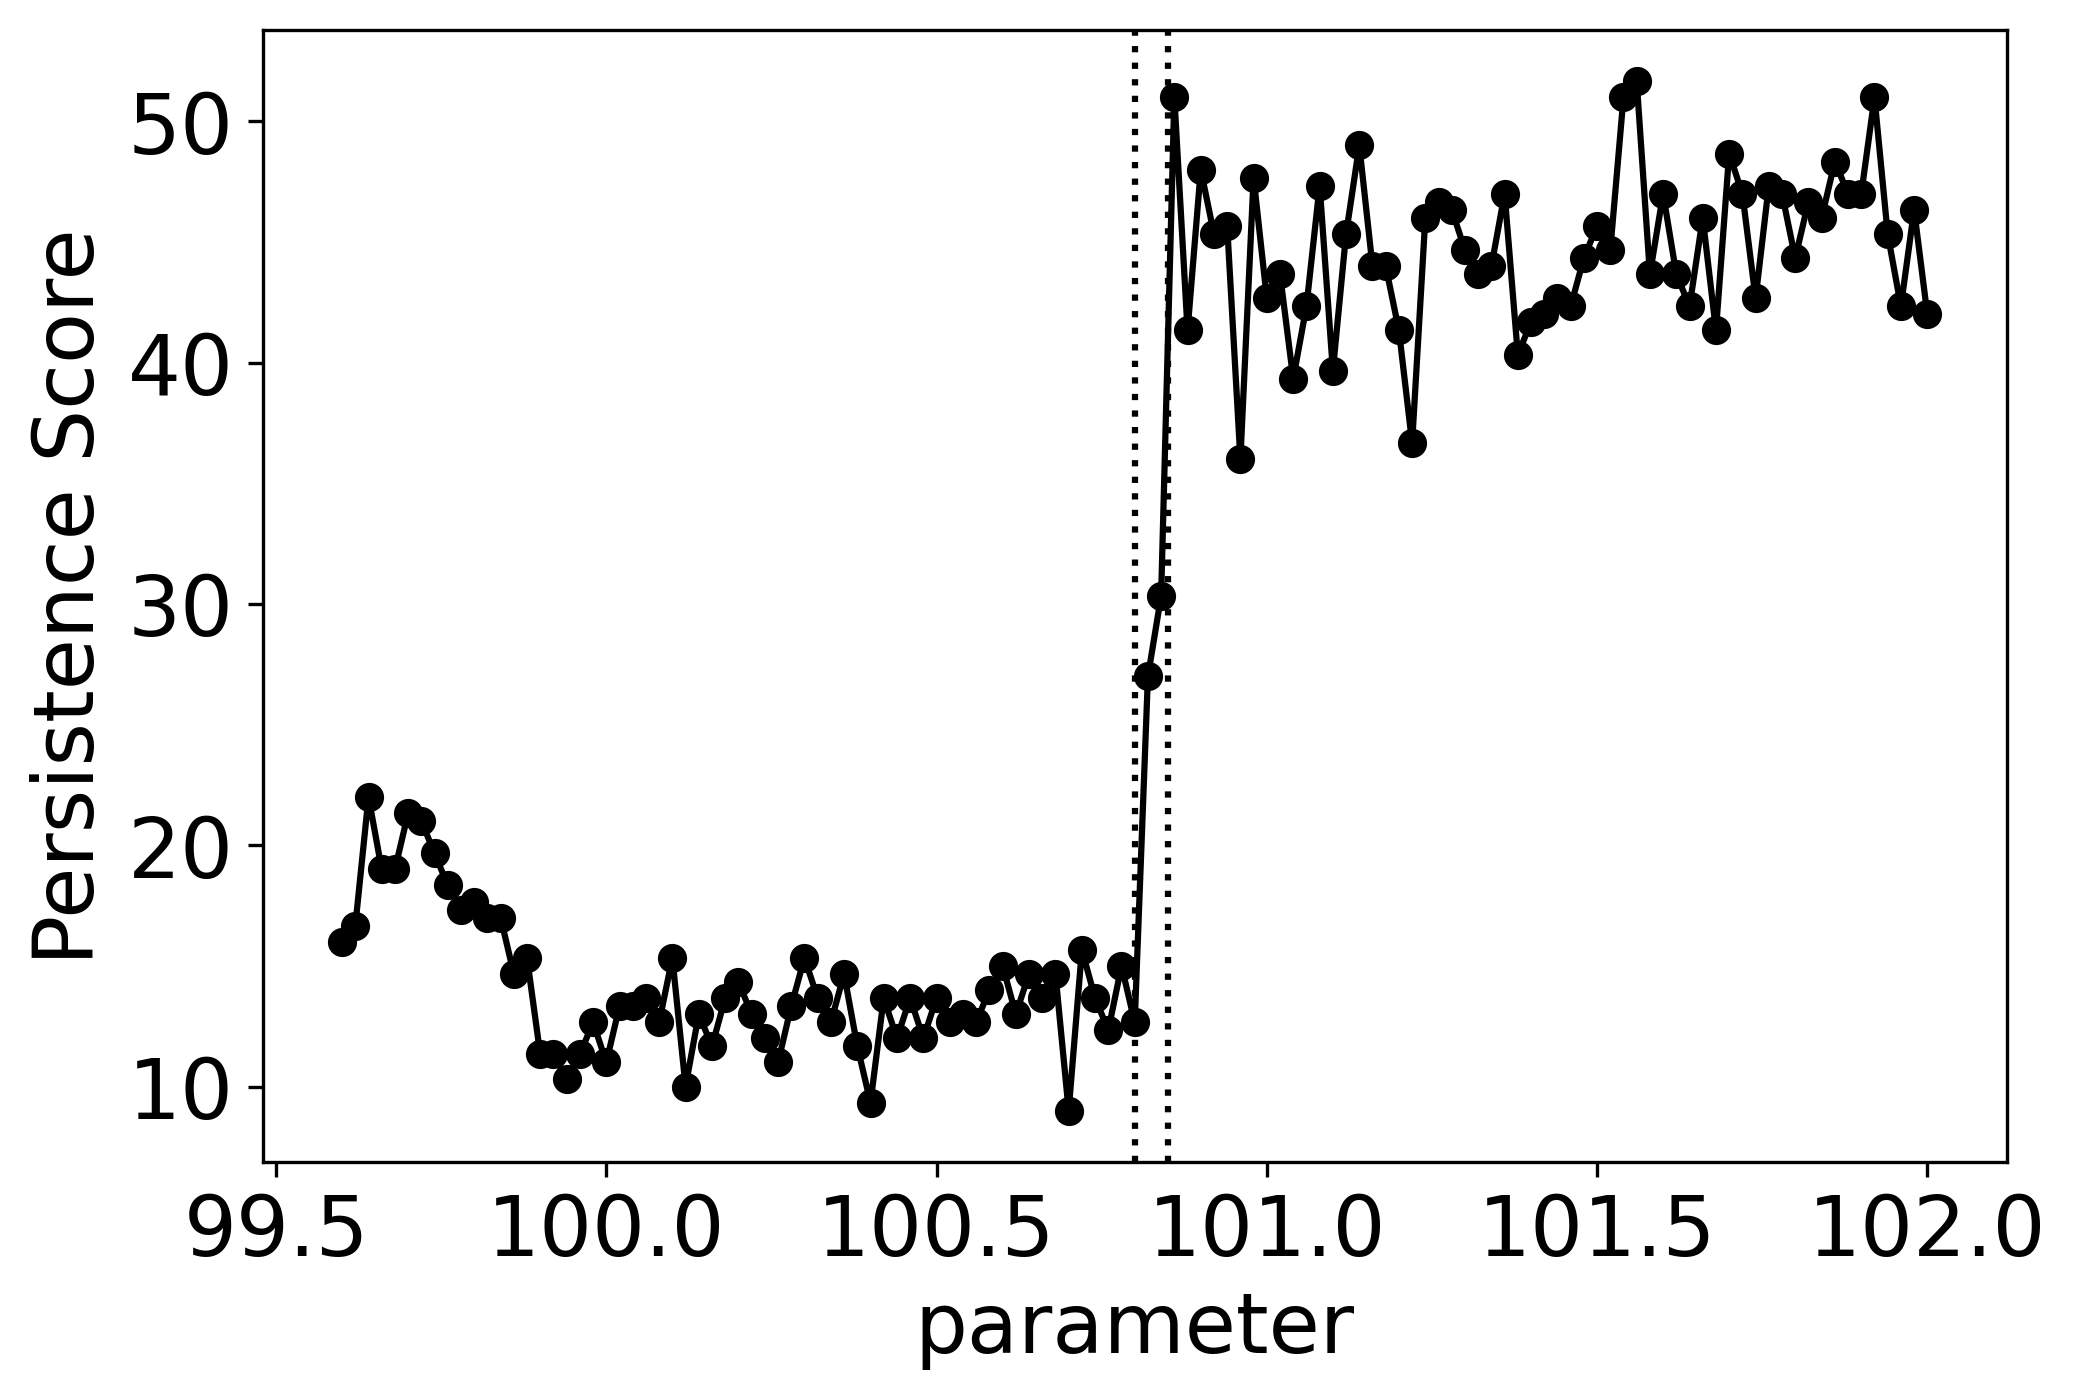

In [8]:
from matplotlib import pyplot as plt

import matplotlib as mpl

mpl.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(7.5,5),dpi=300)



plt.plot(Rho,Scr,linestyle='-', marker='o', color='k')
plt.ylabel('Persistence Score')
plt.xlabel('parameter')

plt.axvline(x = 100.8, color = 'k', linestyle = ':')
plt.axvline(x = 100.85, color = 'k', linestyle = ':')

dict = {'Rho': Rho, 'PS': Scr} 
      
df = pd.DataFrame(dict)

print(df)

# saving the dataframe

df.to_csv(f'lorentz_result_600_PS.csv')

        Rho   NS
0     99.60   48
1     99.62   50
2     99.64   66
3     99.66   57
4     99.68   57
..      ...  ...
116  101.92  153
117  101.94  136
118  101.96  127
119  101.98  139
120  102.00  126

[121 rows x 2 columns]


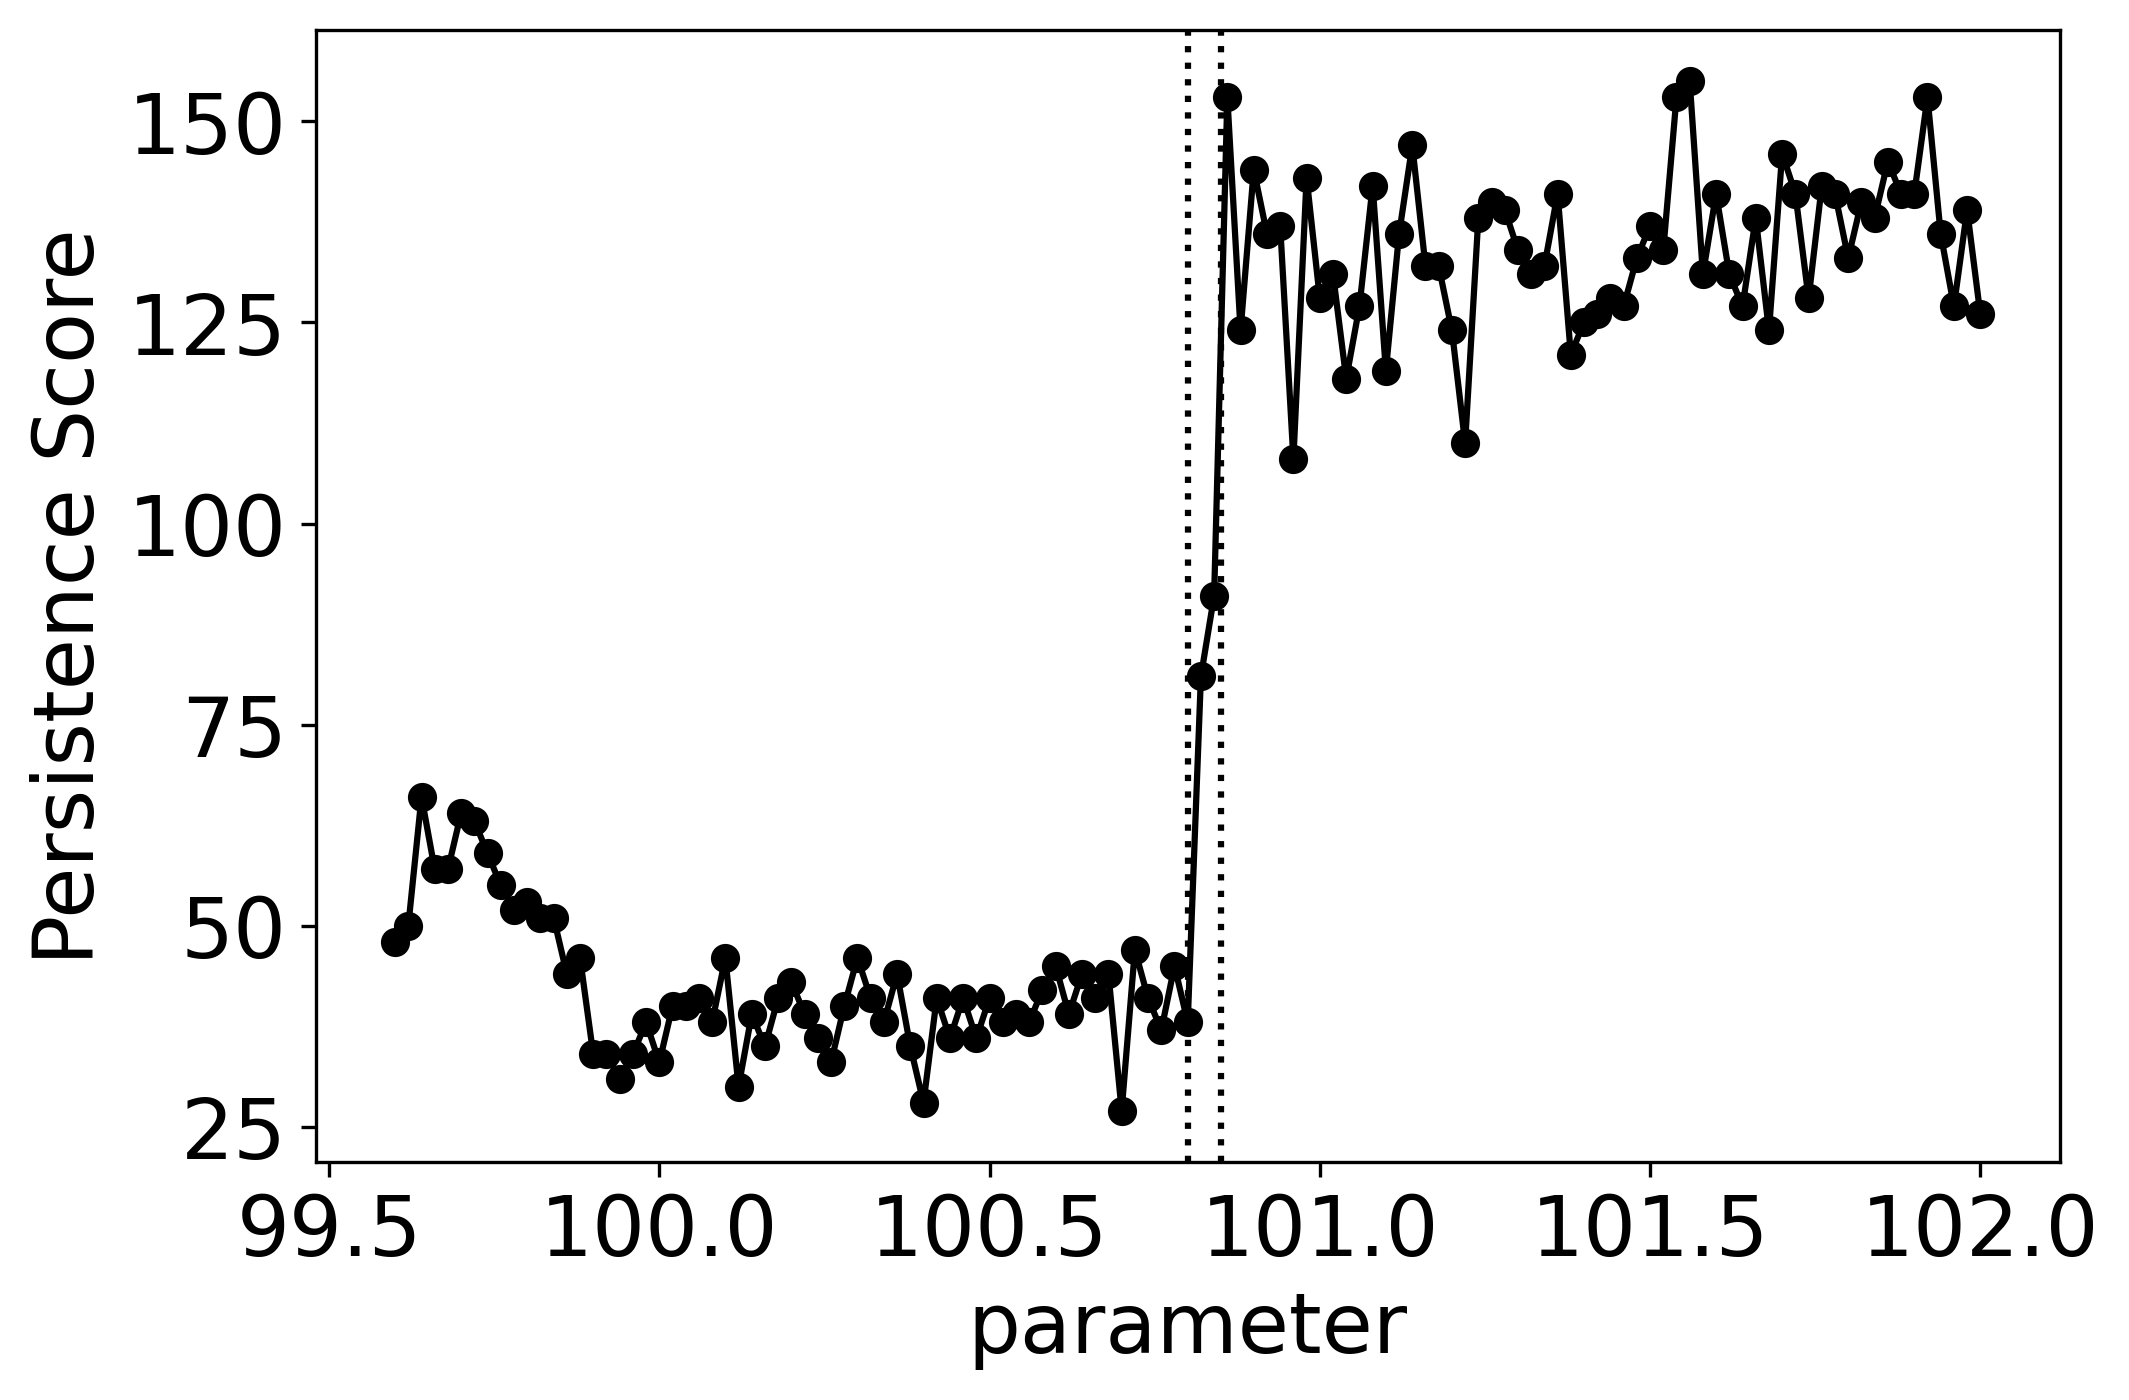

In [9]:
### Noise score

from matplotlib import pyplot as plt
import matplotlib as mpl

mpl.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(7.5,5),dpi=300)



plt.plot(Rho,Noise_score,linestyle='-', marker='o', color='k')
plt.ylabel('Persistence Score')
plt.xlabel('parameter')

plt.axvline(x = 100.8, color = 'k', linestyle = ':')
plt.axvline(x = 100.85, color = 'k', linestyle = ':')

dict = {'Rho': Rho, 'NS': Noise_score} 
      
df = pd.DataFrame(dict)

print(df)

# saving the dataframe

df.to_csv(f'lorentz_result_600_NS.csv')